In [304]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt

std_scaler = preprocessing.StandardScaler()

In [322]:
def cols_with_title_ingr(df):
    return [col for col in df.columns if '::' in col]


def cols_with_underscores(df):
    return [col for col in df.columns if col[0] == '_']


def cols_to_drop(df):
    return cols_with_underscores(df) + cols_with_title_ingr(df)


In [339]:
"""
Goal to train first on 20, then 30, then 40, and so forth and see how accuracy imporves
"""
user = 'greg_test'
name = 'KNN'
classifier = DecisionTreeClassifier(random_state=0, ccp_alpha= 0.015)
# classifier = DecisionTreeClassifier(random_state=0)
# classifier = RandomForestClassifier(n_neighbors= 7)
to_normalize = True


def parse_user_csv(file_name):
    # print('reading csv from ' + file_name)
    try:
        df = pd.read_csv(file_name, index_col=0, header=None)
    except Exception as e:
        print(e)
        return dict()
    d = {}
    for k, v in df.T.to_dict('list').items():
        d[k] = v[0]
    return d

curr_prefs = parse_user_csv('users/user_' + user + '.csv')

data = pd.read_csv('data.csv')

/Users/jamesbuzaid/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: DataFrame columns are not unique, some columns will be omitted.


In [340]:
def random_classify(train_y, test_y):
    # try to predict test_y randomly
    pct_pos = len(train_y[np.where(train_y == 1)]) / len(train_y)

    # how to calculate expected number of correct guesses

    expected_correct = 0
    for y in test_y:
        if y == 1:
            expected_correct += pct_pos
        else:
            expected_correct += (1 - pct_pos)

    return expected_correct / len(test_y)

In [341]:
def train(train_X, train_y):
    
    return classifier.fit(train_X, train_y)

In [342]:
observed = data.loc[curr_prefs.keys()]
ys = pd.Series(curr_prefs)

observed = observed.drop(
    columns=cols_to_drop(observed)).drop(columns=['website'])


accuracy_measurements = {}
rand_accuracy = {}

In [343]:
idx = 10, 20, 40, 60, 80, 100, 120, 140, 160

for i in idx:
    train_X = observed.iloc[:i].to_numpy()
    train_y = ys.iloc[:i].to_numpy()

    test_X = observed.iloc[i:i+50].to_numpy()
    test_y = ys.iloc[i:i+50].to_numpy()

    print(train_X)

    if to_normalize:
        train_X = std_scaler.fit_transform(train_X)
        test_X = std_scaler.transform(test_X)

    clf = train(train_X, train_y)
    actual_acc = clf.score(test_X, test_y)
    expected_random_acc = random_classify(train_y, test_y)

    accuracy_measurements[i] = actual_acc
    rand_accuracy[i] = expected_random_acc

accuracy_measurements = pd.Series(accuracy_measurements)
rand_accuracy = pd.Series(rand_accuracy)

[[1.47550020e+02 1.20049000e-01 6.25969784e-01 8.93221723e-03
  2.22948142e-02 3.20536954e+01 4.48750000e+00 2.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [5.14553015e+02 4.31854210e+01 1.59290541e+01 1.89871362e+00
  6.59550416e+00 1.01071985e+01 6.28437500e+00 3.50000000e+01
  6.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.46616340e+02 5.62913761e+00 2.33558096e+00 4.89763031e-02
  7.85990395e-01 1.85829476e+01 9.79000000e+00 4.20000000e+01
  7.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [3.18768003e+02 2.08579174e+01 5.12924299e-01 1.40491745e-02
  1.29618954e+01 3.44499878e+01 3.19333333e+00 1.60000000e+01
  8.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [6.75504132e+02 6.54164359e+01 4.69177712e+00 1.60978643e-02
  5.68158874e+01 6.67715264e+00 6.50100000e+00 1.11000000e+02
  1.30000000e+01 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [4.67000000e+02 2.66700000e+01 6.67000000e+00 0.00000000e+00
  1

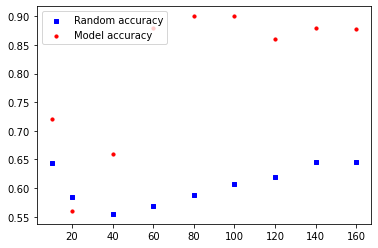

In [344]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

acc = list(accuracy_measurements)
rand_acc = list(rand_accuracy)
idx = idx 

ax1.scatter(idx, rand_acc, s = 10, c = 'b', marker= 's', label = 'Random accuracy')
ax1.scatter(idx, acc, s=10, c='r', marker="o", label='Model accuracy')
plt.legend(loc = 'upper left')
plt.show()
# fig.savefig('test2png.png', dpi=100)
